<a href="https://colab.research.google.com/github/spahlavian/Intro-to-DL-with-fastai/blob/main/Intro_to_DL_02_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~ Practical Deep Learning tutorial -- Episode 2 & 3 ~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

The example used in this notebook was adopted from the following book:
Howard, Jeremy, and Sylvain Gugger. Deep Learning for 
Coders with fastai and PyTorch. O'Reilly Media, 2020.

No licensing is required to use this code, but I will
appreciate  if you reference Rational Machines
IG page and/or YT channel:
@rational_machines
bit.ly/3rU7nKY

-- Written by: Soroush Pahlavian - 2021
"""

Here are the libraries we need to run fastai. Let's install them using pip command:



In [ ]:
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

Next, we create our DataLoaders:

In [ ]:
dest = '/content/DataML'
path = untar_data (URLs.PETS, dest=dest)/'images' 
def is_cat(x): return x[0].isupper() 

dls = ImageDataLoaders.from_name_func(
    path=path, fnames=get_image_files(path),        
    valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

Let's dig into the previous block line-by-line:

In [ ]:
URLs.PETS

In [ ]:
dest = '/content/DataML'
data_dir = untar_data (URLs.PETS, dest=dest)

In [ ]:
data_dir.ls()

In [ ]:
image_dir = data_dir / 'images'

In [ ]:
image_dir.ls()

In [ ]:
list(image_dir.ls())

In [ ]:
fnames = get_image_files(image_dir) # looks for all images recursively.
fnames[346].name

In [ ]:
is_cat("Persian_cat")

Next, we create a learner object using the DataLoaders that we just created:


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.summary()

Now, we can train our model. Here, we use *fine_tune()*, as we don't need to train the all parameters in our network:

In [ ]:
learn.fine_tune(1)

We can check the performance of our model using our own images:

In [ ]:
uploader = widgets.FileUpload()
uploader
img = PILImage.create(uploader.data[0])
prediction,_,probs = learn.predict(img)
print(f'Prediction: {prediction}')
print(probs)

... or using the *show_results()* method of our learner object:

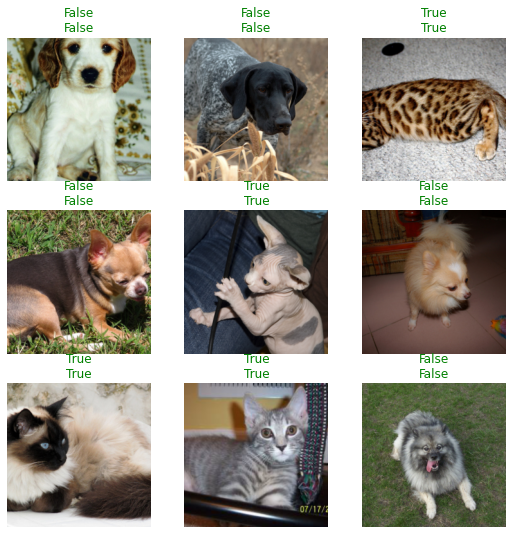

In [ ]:
learn.show_results()

We can use the *doc()* function to view the documentation of various objects/function in fastai:

In [ ]:
doc(ImageDataLoaders.from_name_func)